In [1]:
import pandas as pd

df = pd.read_csv('DataSet - Dataset.csv')
df.head()

,Unnamed: 0,Serial No,userstring,Main_Reference Path,Reference Validity
0,NaN,1,Proposes to identify which of these mental ill...,A Machine Learning and Deep Learning Approach ...,1
1,NaN,2,There are many variations of passages of Lorem...,A Machine Learning and Deep Learning Approach ...,0
2,NaN,3,The most alarming yet abstained issue of our s...,A Machine Learning and Deep Learning Approach ...,1
3,NaN,4,The goal of this study is to determine whether...,A Machine Learning and Deep Learning Approach ...,1
4,NaN,5,"However, who knew that the opinions and though...",A Machine Learning and Deep Learning Approach ...,1


In [2]:
string_list = df['userstring'].tolist()
pdf_list = df['Main_Reference Path'].tolist()
labels = df['Reference Validity']

In [3]:
import os

for pdf in pdf_list:
    if not os.path.isfile(f'{pdf}.pdf'):
        print(pdf)

In [4]:

from roberta import SimilarityChecker

scores = []
for i in range(len(pdf_list)):
    user_text = string_list[i]
    pdf = f'{pdf_list[i]}.pdf'
    try:
        sc = SimilarityChecker(pdf)
        score = sc.search(user_text)
        scores.append(score)
    except RuntimeError:
        print(pdf)

/home/csa/miniconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model check

<AxesSubplot: >

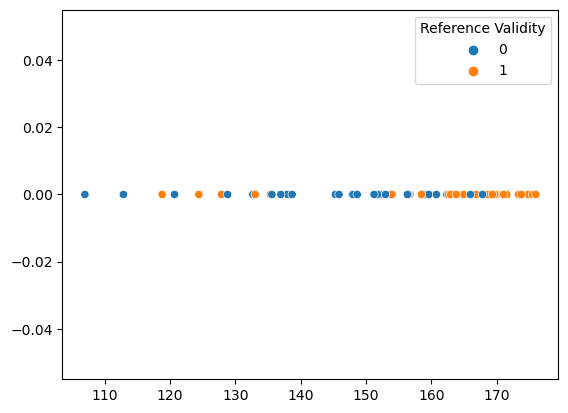

In [5]:
import seaborn as sns 
import numpy as np

sns.scatterplot(x=scores, y=np.zeros_like(scores), hue=labels)

In [6]:
def predict(array):
    return np.array([0 if i < 160 else 1 for i in array])

In [7]:
predictions = predict(scores)
predictions

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [8]:
from sklearn.metrics import classification_report

print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.79      0.73      0.76        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [9]:
df['scores'] = scores
df.head()

,Unnamed: 0,Serial No,userstring,Main_Reference Path,Reference Validity,scores
0,NaN,1,Proposes to identify which of these mental ill...,A Machine Learning and Deep Learning Approach ...,1,163.811127
1,NaN,2,There are many variations of passages of Lorem...,A Machine Learning and Deep Learning Approach ...,0,154.078964
2,NaN,3,The most alarming yet abstained issue of our s...,A Machine Learning and Deep Learning Approach ...,1,160.656586
3,NaN,4,The goal of this study is to determine whether...,A Machine Learning and Deep Learning Approach ...,1,169.352707
4,NaN,5,"However, who knew that the opinions and though...",A Machine Learning and Deep Learning Approach ...,1,164.948990


In [10]:
df.to_csv('Results.csv', index=False)